In [1]:
# bloody dependencies
import matplotlib.pyplot as plt
from nltk.corpus import gutenberg
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error as MSE

# custom classes
from legomena import Corpus, SPGC

In [2]:
# standard project gutenberg corpus
spgc = SPGC.getMeta()

# for now, restrict study to english-only
spgc = spgc[spgc.language == "['en']"]

# preview
spgc.head()

,title,author,authoryearofbirth,authoryearofdeath,language,downloads,subjects,type
id,,,,,,,,
1,The Declaration of Independence of the United ...,"Jefferson, Thomas",1743.0,1826.0,['en'],604.0,"{'United States -- History -- Revolution, 1775...",Text
2,The United States Bill of Rights: The Ten Orig...,United States,NaN,NaN,['en'],158.0,"{'Civil rights -- United States -- Sources', '...",Text
3,John F. Kennedy's Inaugural Address,"Kennedy, John F. (John Fitzgerald)",1917.0,1963.0,['en'],28.0,{'Presidents -- United States -- Inaugural add...,Text
4,Lincoln's Gettysburg Address: Given November 1...,"Lincoln, Abraham",1809.0,1865.0,['en'],55.0,{'Consecration of cemeteries -- Pennsylvania -...,Text
5,The United States Constitution,United States,NaN,NaN,['en'],226.0,"{'United States. Constitution', 'United States...",Text


In [3]:
# most prolific authors
spgc.groupby(["author"]).size().sort_values().to_frame().tail(25)

,0
author,
"James, Henry",78
"Baum, L. Frank (Lyman Frank)",78
"Trollope, Anthony",81
"Dickens, Charles",84
"Stevenson, Robert Louis",86
"Pepys, Samuel",87
"Hawthorne, Nathaniel",96
"Ballantyne, R. M. (Robert Michael)",97
"Alger, Horatio, Jr.",101


In [4]:
# all melville's work
melville = spgc[spgc.author == "Melville, Herman"]
melville.sort_values("downloads").tail()

,title,author,authoryearofbirth,authoryearofdeath,language,downloads,subjects,type
id,,,,,,,,
2489,"Moby Dick; Or, The Whale","Melville, Herman",1819.0,1891.0,['en'],324.0,"{'Mentally ill -- Fiction', 'Whaling ships -- ...",Text
21816,The Confidence-Man: His Masquerade,"Melville, Herman",1819.0,1891.0,['en'],518.0,"{'Satire', 'Swindlers and swindling -- Fiction...",Text
11231,"Bartleby, the Scrivener: A Story of Wall-Street","Melville, Herman",1819.0,1891.0,['en'],740.0,"{'Young men -- Fiction', 'Copyists -- Fiction'...",Text
15,Moby Dick,"Melville, Herman",1819.0,1891.0,['en'],905.0,"{'Mentally ill -- Fiction', 'Whaling ships -- ...",Text
2701,"Moby Dick; Or, The Whale","Melville, Herman",1819.0,1891.0,['en'],14337.0,"{'Whaling ships -- Fiction', 'Mentally ill -- ...",Text


In [5]:
# moby dick
mobydick = SPGC.get(2701)

Number of tokens (<corpus>.M): 210258
Number of types  (<corpus>.N): 16402
Legomena vector  (<corpus>.k): [   0 7197 2781 1555  872  632  439  338  303]
Frequency distribution accessible as <corpus>.fdist


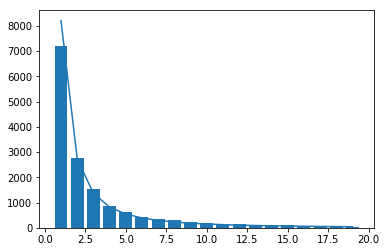

In [6]:
# k-legomena distributions
x = np.arange(1, 20)
plt.bar(x, mobydick.k[x])
plt.plot(x, mobydick.N/x/(x+1))
plt.show()

In [7]:
# load all melville into memory
corpi = {}
for pgid in melville.index.values:
    corpus = SPGC.get(pgid)
    if corpus is None:
        continue
    corpus.fit() # best fit logarithmic model: M_z,N_z
#     corpus.buildTTRCurve() # empirical TTR: 100 samples
#     corpus.M_z_method1 = corpus.M_z
#     corpus.N_z_method1 = corpus.N_z
#     corpus.fit(iterations = 9999) # best fit logarithmic model: M_z,N_z
    corpi[pgid] = corpus

Number of tokens (<corpus>.M): 1352
Number of types  (<corpus>.N): 595
Legomena vector  (<corpus>.k): [  0 448  66  24  14  10   8   5   3]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 113161
Number of types  (<corpus>.N): 10382
Legomena vector  (<corpus>.k): [   0 4518 1709  914  633  460  278  235  170]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 210370
Number of types  (<corpus>.N): 16570
Legomena vector  (<corpus>.k): [   0 7278 2796 1591  875  643  447  331  306]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 11276
Number of types  (<corpus>.N): 2606
Legomena vector  (<corpus>.k): [   0 1686  377  171   68   54   36   26   13]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corp

In [8]:
# tabulate (M,N,k1) for all of melville
df = [ (pgid, corpus.M, corpus.N, corpus.M_z, corpus.N_z, corpus.k[1]) for pgid, corpus in corpi.items() ]
df = pd.DataFrame(df, columns = ["id", "tokens", "types", "M_z", "N_z", "hapaxes"])
df = df.set_index("id")
df

,tokens,types,M_z,N_z,hapaxes
id,,,,,
15,1352,595,52268,6131,448
1900,113161,10382,51570,7190,4518
2489,210370,16570,100790,11729,7278
2694,11276,2606,72668,7614,1686
2701,210258,16402,100192,11583,7197
4045,101290,10415,60840,8159,4767
8118,117072,10973,81138,9186,5152
10712,135918,12873,78906,9929,5856
11231,14293,2923,55440,6207,1782


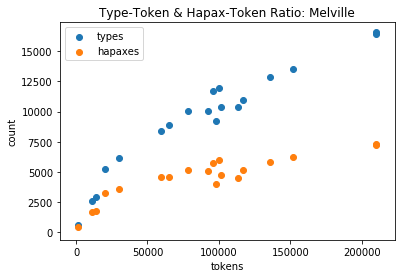

In [9]:
# draw a pretty picture
plt.scatter(df.tokens, df.types, label = "types")
plt.scatter(df.tokens, df.hapaxes, label = "hapaxes")
plt.title("Type-Token & Hapax-Token Ratio: Melville")
plt.xlabel("tokens")
plt.ylabel("count")
plt.legend()
plt.show()

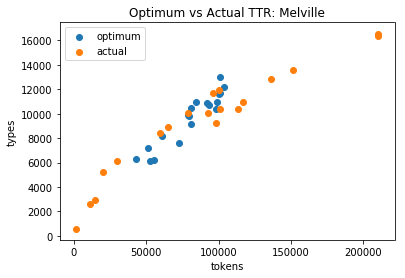

In [10]:
# optimum vs actual
plt.scatter(df.M_z, df.N_z, label = "optimum")
plt.scatter(df.tokens, df.types, label = "actual")
plt.title("Optimum vs Actual TTR: Melville")
plt.xlabel("tokens")
plt.ylabel("types")
plt.legend()
plt.show()

In [14]:
df["title"] = melville["title"]
df.sort_values("types")

,tokens,types,M_z,N_z,hapaxes,title
id,,,,,,
15,1352,595,52268,6131,448,Moby Dick
2694,11276,2606,72668,7614,1686,I and My Chimney
11231,14293,2923,55440,6207,1782,"Bartleby, the Scrivener: A Story of Wall-Street"
12841,20241,5226,101098,12979,3285,John Marr and Other Poems
12384,30158,6148,80646,10463,3570,Battle-Pieces and Aspects of the War
53861,59780,8418,98945,10944,4561,The Apple-Tree Table and Other Sketches
15422,64822,8897,79207,9851,4597,Israel Potter: His Fifty Years of Exile
28656,98129,9239,43037,6293,3992,Typee
21816,92717,10058,98534,10370,5080,The Confidence-Man: His Masquerade


In [19]:
# choose two books
corpusA  = corpi['28656']
corpusB  = corpi['8118']
corpusAB = Corpus(corpusA.tokens + corpusB.tokens)

# build TTR curves
corpusA.buildTTRCurve()
corpusB.buildTTRCurve()
corpusAB.buildTTRCurve()

# fit log function
corpusA.fit()
corpusB.fit()
corpusAB.fit()

Number of tokens (<corpus>.M): 215201
Number of types  (<corpus>.N): 14911
Legomena vector  (<corpus>.k): [   0 6064 2491 1386  892  611  454  377  253]
Frequency distribution accessible as <corpus>.fdist
Type-Token Relation data accessible as <corpus>.TTR
Type-Token Relation data accessible as <corpus>.TTR
Type-Token Relation data accessible as <corpus>.TTR
Log model accessible as <corpus>.M_z, .N_z
Log model accessible as <corpus>.M_z, .N_z
Log model accessible as <corpus>.M_z, .N_z


(68547, 8882)

|A| = 9239
|B| = 10973
|A ∪ B| = 14911
|A ∩ B| = 5301


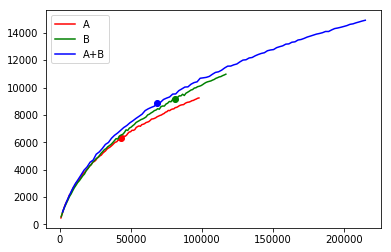

(M_z, N_z) = (43037, 6293)
(M_z, N_z) = (81138, 9186)
(M_z, N_z) = (68547, 8882)
A+B, theory: [63764.  7867.]


In [27]:
# venn diagram of types
A = set(corpusA.types)
B = set(corpusB.types)
print("|A| =", len(A))
print("|B| =", len(B))
print("|A ∪ B| =", len(A.union(B)))
print("|A ∩ B| =", len(A.intersection(B)))

# vectorize
A_  = np.array([ corpusA.M_z, corpusA.N_z ])
B_  = np.array([ corpusB.M_z, corpusB.N_z ])
AB_ = np.array([ corpusAB.M_z, corpusAB.N_z ])

# plot C=A+B
plt.plot(corpusA.TTR.m_tokens, corpusA.TTR.n_types, color = "r", label = "A")
plt.plot(corpusB.TTR.m_tokens, corpusB.TTR.n_types, color = "g", label = "B")
plt.plot(corpusAB.TTR.m_tokens, corpusAB.TTR.n_types, color = "b", label = "A+B")
plt.scatter([corpusA.M_z], [corpusA.N_z], color = "r")
plt.scatter([corpusB.M_z], [corpusB.N_z], color = "g")
plt.scatter([corpusAB.M_z], [corpusAB.N_z], color = "b")
plt.legend()
plt.show()

# combine
for corpus in [ corpusA, corpusB, corpusAB ]:
    print("(M_z, N_z) =", (corpus.M_z, corpus.N_z))
    
AB_theory = np.round((corpusA.M * A_ + corpusB.M * B_) / corpusAB.M)
print("A+B, theory:", AB_theory)

In [19]:
print("mobydick:", (mobydick.M_z, mobydick.N_z))
print("redburn:", (redburn.M_z, redburn.N_z))
print("composite:", (composite.M_z, composite.N_z))

mobydick: (100192, 11583)
redburn: (81138, 9186)
composite: (99826, 11707)


,m_tokens,n_types
0,2102,903
1,4205,1530
2,6307,2082
3,8410,2526
4,10512,3003


In [11]:
# now a more complete study
authors = ["Zola, Émile", "Stevenson, Robert Louis", "Hawthorne, Nathaniel", "Dickens, Charles", "Dumas, Alexandre", "Verne, Jules", "Twain, Mark", "Shakespeare, William"]
for author in authors:
    print("Working on", author)
    
    # all author's works
    books = spgc[spgc.author == author]
    
    # build & fit each corpus
    for pgid in books.index.values:
        corpus = SPGC.get(pgid)
        if corpus is None:
            continue
    #     corpus.buildTTRCurve() # empirical TTR: 100 samples
    #     corpus.fitHeaps() # best fit heaps law: K,B
        corpus.fit() # best fit logarithmic model: M_z,N_z
        corpi[pgid] = corpus

Working on Zola, Émile
Number of tokens (<corpus>.M): 206100
Number of types  (<corpus>.N): 12161
Legomena vector  (<corpus>.k): [   0 4813 1931 1042  729  489  397  288  213]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 127721
Number of types  (<corpus>.N): 9764
Legomena vector  (<corpus>.k): [   0 3926 1574  922  598  397  286  246  202]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 114956
Number of types  (<corpus>.N): 10346
Legomena vector  (<corpus>.k): [   0 4698 1704  901  564  401  295  196  162]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 131623
Number of types  (<corpus>.N): 11382
Legomena vector  (<corpus>.k): [   0 5127 1856  987  611  436  323  247  195]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corp

Number of tokens (<corpus>.M): 36635
Number of types  (<corpus>.N): 4985
Legomena vector  (<corpus>.k): [   0 2442  880  445  267  147  107   92   81]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 41119
Number of types  (<corpus>.N): 5352
Legomena vector  (<corpus>.k): [   0 2663  883  467  255  193  133  106   84]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 39290
Number of types  (<corpus>.N): 4859
Legomena vector  (<corpus>.k): [   0 2416  775  410  272  172  120   95   70]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 43044
Number of types  (<corpus>.N): 5468
Legomena vector  (<corpus>.k): [   0 2701  906  440  285  203  142  112   75]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens

Number of tokens (<corpus>.M): 55224
Number of types  (<corpus>.N): 16648
Legomena vector  (<corpus>.k): [    0 11241  2383   949   512   315   226   156   116]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 166536
Number of types  (<corpus>.N): 29354
Legomena vector  (<corpus>.k): [    0 16974  4443  2087  1152   808   591   441   344]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 80075
Number of types  (<corpus>.N): 19526
Legomena vector  (<corpus>.k): [    0 12668  2765  1162   676   459   275   204   165]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 101236
Number of types  (<corpus>.N): 21438
Legomena vector  (<corpus>.k): [    0 13623  3078  1327   754   462   341   253   171]
Frequency distribution accessible as <corpus>.fdist
Log model accessi

Number of tokens (<corpus>.M): 101648
Number of types  (<corpus>.N): 8821
Legomena vector  (<corpus>.k): [   0 4233 1529  767  412  282  220  183  135]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 48973
Number of types  (<corpus>.N): 4231
Legomena vector  (<corpus>.k): [   0 2045  652  364  191  122   91   96   68]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 14436
Number of types  (<corpus>.N): 1941
Legomena vector  (<corpus>.k): [  0 993 302 128  99  73  44  32  34]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 78418
Number of types  (<corpus>.N): 8447
Legomena vector  (<corpus>.k): [   0 4311 1388  706  381  261  210  159  116]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpu

Number of tokens (<corpus>.M): 79331
Number of types  (<corpus>.N): 6916
Legomena vector  (<corpus>.k): [   0 3196 1141  580  336  251  188  148  108]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 85810
Number of types  (<corpus>.N): 7271
Legomena vector  (<corpus>.k): [   0 3539 1144  606  379  241  167  165  111]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 136184
Number of types  (<corpus>.N): 11565
Legomena vector  (<corpus>.k): [   0 5458 1910  972  636  410  306  239  186]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 57910
Number of types  (<corpus>.N): 6766
Legomena vector  (<corpus>.k): [   0 3480 1165  534  368  213  147   97   77]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of toke

Number of tokens (<corpus>.M): 132365
Number of types  (<corpus>.N): 10915
Legomena vector  (<corpus>.k): [   0 5137 1890  941  563  374  284  194  161]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 100374
Number of types  (<corpus>.N): 7395
Legomena vector  (<corpus>.k): [   0 3509 1203  600  381  246  173  136  135]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 122353
Number of types  (<corpus>.N): 10970
Legomena vector  (<corpus>.k): [   0 5548 1790  899  532  346  226  195  162]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 86483
Number of types  (<corpus>.N): 7332
Legomena vector  (<corpus>.k): [   0 3538 1173  613  388  244  159  171  112]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of t

Number of tokens (<corpus>.M): 77259
Number of types  (<corpus>.N): 8249
Legomena vector  (<corpus>.k): [   0 3787 1436  680  493  333  237  159  130]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 40701
Number of types  (<corpus>.N): 5134
Legomena vector  (<corpus>.k): [   0 2517  829  463  257  190  122   91   78]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 16540
Number of types  (<corpus>.N): 3521
Legomena vector  (<corpus>.k): [   0 2112  600  256  142   87   40   31   31]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 93288
Number of types  (<corpus>.N): 8439
Legomena vector  (<corpus>.k): [   0 3957 1332  754  505  309  235  142  127]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens

Number of tokens (<corpus>.M): 2735
Number of types  (<corpus>.N): 989
Legomena vector  (<corpus>.k): [  0 687 126  58  28  21   9   8   5]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 3343
Number of types  (<corpus>.N): 1099
Legomena vector  (<corpus>.k): [  0 738 151  70  29  23  16   7  10]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 10780
Number of types  (<corpus>.N): 2811
Legomena vector  (<corpus>.k): [   0 1814  453  157   86   66   38   28   20]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 5287
Number of types  (<corpus>.N): 1699
Legomena vector  (<corpus>.k): [   0 1196  224   91   43   21   21   13   12]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 3030
Nu

Number of tokens (<corpus>.M): 21922
Number of types  (<corpus>.N): 3284
Legomena vector  (<corpus>.k): [   0 1686  593  267  168  102   67   46   50]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
"There is no item named 'SPGC-counts-2018-07-18/PG9255_counts.txt' in the archive"
Number of tokens (<corpus>.M): 7033
Number of types  (<corpus>.N): 1396
Legomena vector  (<corpus>.k): [  0 802 208  94  69  27  22  13  20]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 9359
Number of types  (<corpus>.N): 1896
Legomena vector  (<corpus>.k): [   0 1114  289  134   64   54   30   30    9]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 7735
Number of types  (<corpus>.N): 1640
Legomena vector  (<corpus>.k): [  0 902 291 127  66  38  32  32  14]
Frequency distribution accessible as <corpus>.fdi

Number of tokens (<corpus>.M): 8451
Number of types  (<corpus>.N): 1723
Legomena vector  (<corpus>.k): [   0 1014  261  114   72   43   28   20   19]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 12885
Number of types  (<corpus>.N): 2368
Legomena vector  (<corpus>.k): [   0 1321  411  178   82   53   41   45   19]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 10891
Number of types  (<corpus>.N): 2207
Legomena vector  (<corpus>.k): [   0 1372  319  142   78   44   29   23   18]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 357911
Number of types  (<corpus>.N): 14706
Legomena vector  (<corpus>.k): [   0 5444 2334 1317  868  635  457  402  297]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of token

Number of tokens (<corpus>.M): 23601
Number of types  (<corpus>.N): 4323
Legomena vector  (<corpus>.k): [   0 2510  718  339  187   91   83   52   34]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 12674
Number of types  (<corpus>.N): 2096
Legomena vector  (<corpus>.k): [   0 1179  330  139   93   44   36   35   23]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 20595
Number of types  (<corpus>.N): 3462
Legomena vector  (<corpus>.k): [   0 2046  531  230  140   87   59   41   26]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 33521
Number of types  (<corpus>.N): 4144
Legomena vector  (<corpus>.k): [   0 2149  680  338  174  129   94   75   47]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens

Number of tokens (<corpus>.M): 31232
Number of types  (<corpus>.N): 5382
Legomena vector  (<corpus>.k): [   0 3303  819  351  178  113   81   52   47]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 28873
Number of types  (<corpus>.N): 4181
Legomena vector  (<corpus>.k): [   0 2345  687  326  144  111   82   59   36]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 33732
Number of types  (<corpus>.N): 8781
Legomena vector  (<corpus>.k): [   0 5639 1230  577  275  214  142  106   82]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 61978
Number of types  (<corpus>.N): 5902
Legomena vector  (<corpus>.k): [   0 2752  964  542  279  208  158  110   80]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens

Number of tokens (<corpus>.M): 65821
Number of types  (<corpus>.N): 4466
Legomena vector  (<corpus>.k): [   0 2039  678  342  206  179  121  105   69]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 28572
Number of types  (<corpus>.N): 3594
Legomena vector  (<corpus>.k): [   0 1970  580  234  147   90   87   57   43]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 58124
Number of types  (<corpus>.N): 5960
Legomena vector  (<corpus>.k): [   0 3071  970  438  277  183  136   99   83]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 190638
Number of types  (<corpus>.N): 10167
Legomena vector  (<corpus>.k): [   0 4123 1582  878  537  401  308  236  191]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of toke

Number of tokens (<corpus>.M): 74423
Number of types  (<corpus>.N): 8225
Legomena vector  (<corpus>.k): [   0 4293 1353  649  389  266  180  136  100]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 69710
Number of types  (<corpus>.N): 8057
Legomena vector  (<corpus>.k): [   0 4281 1262  625  371  259  177  138  113]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 47025
Number of types  (<corpus>.N): 6862
Legomena vector  (<corpus>.k): [   0 3779 1147  496  287  206  144  133   86]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 46693
Number of types  (<corpus>.N): 6569
Legomena vector  (<corpus>.k): [   0 3591 1085  467  283  207  136  106   82]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens

Number of tokens (<corpus>.M): 56891
Number of types  (<corpus>.N): 7323
Legomena vector  (<corpus>.k): [   0 3989 1126  552  326  230  156  105   95]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 57775
Number of types  (<corpus>.N): 7535
Legomena vector  (<corpus>.k): [   0 4042 1243  589  334  215  168   98   91]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 54888
Number of types  (<corpus>.N): 7006
Legomena vector  (<corpus>.k): [   0 3684 1180  549  316  212  152  118   87]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 61243
Number of types  (<corpus>.N): 8140
Legomena vector  (<corpus>.k): [   0 4252 1349  678  412  254  182  134  116]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens

Number of tokens (<corpus>.M): 56943
Number of types  (<corpus>.N): 7014
Legomena vector  (<corpus>.k): [   0 3801 1089  513  302  206  163  123   94]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 196123
Number of types  (<corpus>.N): 37630
Legomena vector  (<corpus>.k): [    0 23824  5282  2254  1374   876   587   453   343]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 21314
Number of types  (<corpus>.N): 7066
Legomena vector  (<corpus>.k): [   0 4787  969  424  216  145   83   69   51]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 174850
Number of types  (<corpus>.N): 12517
Legomena vector  (<corpus>.k): [   0 5493 1919 1097  679  489  336  302  204]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Num

Number of tokens (<corpus>.M): 52264
Number of types  (<corpus>.N): 5633
Legomena vector  (<corpus>.k): [   0 2632  962  490  281  213  144  114   99]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 52319
Number of types  (<corpus>.N): 5695
Legomena vector  (<corpus>.k): [   0 2669  975  497  284  203  154  112   99]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 93147
Number of types  (<corpus>.N): 7274
Legomena vector  (<corpus>.k): [   0 3222 1097  601  393  250  192  160  149]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 154000
Number of types  (<corpus>.N): 10441
Legomena vector  (<corpus>.k): [   0 4322 1690  913  573  412  348  219  187]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of toke

Number of tokens (<corpus>.M): 70097
Number of types  (<corpus>.N): 8082
Legomena vector  (<corpus>.k): [   0 4174 1347  619  376  259  180  138   96]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 69440
Number of types  (<corpus>.N): 7731
Legomena vector  (<corpus>.k): [   0 4049 1207  593  351  242  165  132  102]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 63526
Number of types  (<corpus>.N): 8300
Legomena vector  (<corpus>.k): [   0 4377 1350  641  403  281  190  136   90]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 56131
Number of types  (<corpus>.N): 5584
Legomena vector  (<corpus>.k): [   0 2437 1019  487  314  209  158  119   93]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens

Number of tokens (<corpus>.M): 85864
Number of types  (<corpus>.N): 7592
Legomena vector  (<corpus>.k): [   0 3439 1170  645  408  304  191  170  129]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 77895
Number of types  (<corpus>.N): 8203
Legomena vector  (<corpus>.k): [   0 4042 1354  650  383  261  211  150  129]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 75886
Number of types  (<corpus>.N): 9638
Legomena vector  (<corpus>.k): [   0 5232 1534  733  424  296  201  151  122]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 71638
Number of types  (<corpus>.N): 6891
Legomena vector  (<corpus>.k): [   0 3302 1114  566  339  228  189  144   93]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens

Number of tokens (<corpus>.M): 49145
Number of types  (<corpus>.N): 7682
Legomena vector  (<corpus>.k): [   0 4259 1270  620  354  201  145  112   72]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 48905
Number of types  (<corpus>.N): 15538
Legomena vector  (<corpus>.k): [    0 10630  2130   868   450   305   208   146   102]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 47500
Number of types  (<corpus>.N): 14876
Legomena vector  (<corpus>.k): [    0 10233  1974   880   451   248   189   129   104]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 42281
Number of types  (<corpus>.N): 13730
Legomena vector  (<corpus>.k): [   0 9366 1923  785  388  254  191  112  102]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, 

Number of tokens (<corpus>.M): 93413
Number of types  (<corpus>.N): 9165
Legomena vector  (<corpus>.k): [   0 4317 1577  775  517  328  272  177  141]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 141309
Number of types  (<corpus>.N): 11409
Legomena vector  (<corpus>.k): [   0 5116 1922  981  630  394  310  244  188]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 14692
Number of types  (<corpus>.N): 2207
Legomena vector  (<corpus>.k): [   0 1216  319  183   89   60   53   29   26]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 17217
Number of types  (<corpus>.N): 2757
Legomena vector  (<corpus>.k): [   0 1624  388  193   99   70   55   34   30]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of toke

Number of tokens (<corpus>.M): 44506
Number of types  (<corpus>.N): 5571
Legomena vector  (<corpus>.k): [   0 2934  903  461  241  160  124  100   58]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 63404
Number of types  (<corpus>.N): 6892
Legomena vector  (<corpus>.k): [   0 3429 1108  609  365  223  166  120   96]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 76114
Number of types  (<corpus>.N): 7679
Legomena vector  (<corpus>.k): [   0 3779 1272  637  392  267  178  133  123]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 31197
Number of types  (<corpus>.N): 4666
Legomena vector  (<corpus>.k): [   0 2541  769  378  211  136   93   76   44]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens

Number of tokens (<corpus>.M): 22529
Number of types  (<corpus>.N): 3729
Legomena vector  (<corpus>.k): [   0 2100  607  291  149  110   61   46   42]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 18775
Number of types  (<corpus>.N): 3840
Legomena vector  (<corpus>.k): [   0 2354  640  225  136   81   60   33   38]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 13759
Number of types  (<corpus>.N): 2789
Legomena vector  (<corpus>.k): [   0 1673  433  202  107   60   38   33   21]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 14369
Number of types  (<corpus>.N): 3287
Legomena vector  (<corpus>.k): [   0 1998  541  236  129   81   33   29   32]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens

Number of tokens (<corpus>.M): 11397
Number of types  (<corpus>.N): 2415
Legomena vector  (<corpus>.k): [   0 1526  371  146   71   42   36   27   22]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 11454
Number of types  (<corpus>.N): 2413
Legomena vector  (<corpus>.k): [   0 1488  366  170   86   54   32   16   21]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 19095
Number of types  (<corpus>.N): 3539
Legomena vector  (<corpus>.k): [   0 2139  565  221  139   86   42   43   29]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 14001
Number of types  (<corpus>.N): 2906
Legomena vector  (<corpus>.k): [   0 1751  460  212  112   55   50   32   34]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens

Number of tokens (<corpus>.M): 9303
Number of types  (<corpus>.N): 3041
Legomena vector  (<corpus>.k): [   0 2175  395  136   89   39   32   22   20]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 73961
Number of types  (<corpus>.N): 8508
Legomena vector  (<corpus>.k): [   0 4574 1287  674  382  234  204  118  124]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 9539
Number of types  (<corpus>.N): 2342
Legomena vector  (<corpus>.k): [   0 1439  415  157   82   45   25   27   10]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 108219
Number of types  (<corpus>.N): 9327
Legomena vector  (<corpus>.k): [   0 4313 1558  785  534  339  240  181  147]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens 

Number of tokens (<corpus>.M): 18027
Number of types  (<corpus>.N): 2533
Legomena vector  (<corpus>.k): [   0 1372  394  188  104   74   50   52   33]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 22439
Number of types  (<corpus>.N): 3471
Legomena vector  (<corpus>.k): [   0 1908  580  253  142  113   66   50   45]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 21370
Number of types  (<corpus>.N): 3320
Legomena vector  (<corpus>.k): [   0 1848  541  230  141   75   57   43   38]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 22971
Number of types  (<corpus>.N): 3428
Legomena vector  (<corpus>.k): [   0 1848  546  248  152  105   73   51   36]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens

Number of tokens (<corpus>.M): 30787
Number of types  (<corpus>.N): 3765
Legomena vector  (<corpus>.k): [   0 1904  610  301  176  126   74   66   51]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 15911
Number of types  (<corpus>.N): 2351
Legomena vector  (<corpus>.k): [   0 1323  348  160   93   64   48   34   27]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 14685
Number of types  (<corpus>.N): 3326
Legomena vector  (<corpus>.k): [   0 1956  546  248  129  100   50   36   31]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 14693
Number of types  (<corpus>.N): 3325
Legomena vector  (<corpus>.k): [   0 1945  552  246  133  101   52   36   30]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens

Number of tokens (<corpus>.M): 20236
Number of types  (<corpus>.N): 3131
Legomena vector  (<corpus>.k): [   0 1726  519  200  130   93   60   46   43]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 17440
Number of types  (<corpus>.N): 2928
Legomena vector  (<corpus>.k): [   0 1639  475  219  123   66   67   37   40]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 25521
Number of types  (<corpus>.N): 3563
Legomena vector  (<corpus>.k): [   0 1991  573  240  130  108   67   64   37]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 17169
Number of types  (<corpus>.N): 2952
Legomena vector  (<corpus>.k): [   0 1698  436  221  124   71   51   45   28]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens

Number of tokens (<corpus>.M): 18043
Number of types  (<corpus>.N): 3144
Legomena vector  (<corpus>.k): [   0 1840  462  217  119   80   59   32   34]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 25937
Number of types  (<corpus>.N): 3666
Legomena vector  (<corpus>.k): [   0 2090  549  236  148  101   67   54   33]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 28728
Number of types  (<corpus>.N): 3720
Legomena vector  (<corpus>.k): [   0 2084  540  266  161   97   67   50   44]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 19288
Number of types  (<corpus>.N): 3077
Legomena vector  (<corpus>.k): [   0 1725  470  220  122   82   52   54   42]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens

Number of tokens (<corpus>.M): 25640
Number of types  (<corpus>.N): 3922
Legomena vector  (<corpus>.k): [   0 2240  604  258  159  119   51   48   37]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 19358
Number of types  (<corpus>.N): 3474
Legomena vector  (<corpus>.k): [   0 2051  511  256  135   76   49   50   40]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 20877
Number of types  (<corpus>.N): 3079
Legomena vector  (<corpus>.k): [   0 1694  490  204  142   82   67   41   39]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 18033
Number of types  (<corpus>.N): 3454
Legomena vector  (<corpus>.k): [   0 2084  510  216  146   87   58   33   31]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens

Number of tokens (<corpus>.M): 77388
Number of types  (<corpus>.N): 8672
Legomena vector  (<corpus>.k): [   0 4626 1434  688  422  224  207  120  107]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 22801
Number of types  (<corpus>.N): 3821
Legomena vector  (<corpus>.k): [   0 2152  678  271  157   79   69   35   30]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 25337
Number of types  (<corpus>.N): 4624
Legomena vector  (<corpus>.k): [   0 2717  749  308  183  106   88   70   46]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 46647
Number of types  (<corpus>.N): 7027
Legomena vector  (<corpus>.k): [   0 4088 1122  495  290  189  125   83   57]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens

Number of tokens (<corpus>.M): 24552
Number of types  (<corpus>.N): 4368
Legomena vector  (<corpus>.k): [   0 2603  680  306  158  110   78   54   46]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 18333
Number of types  (<corpus>.N): 3479
Legomena vector  (<corpus>.k): [   0 2123  525  203  122   85   69   43   38]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 20565
Number of types  (<corpus>.N): 7018
Legomena vector  (<corpus>.k): [   0 5111  825  311  181  124   70   56   43]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 25233
Number of types  (<corpus>.N): 3949
Legomena vector  (<corpus>.k): [   0 2289  613  277  157   85   63   65   33]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens

Number of tokens (<corpus>.M): 20633
Number of types  (<corpus>.N): 6822
Legomena vector  (<corpus>.k): [   0 4792  902  338  190  124   69   66   54]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 19121
Number of types  (<corpus>.N): 3740
Legomena vector  (<corpus>.k): [   0 2344  519  273  141   79   60   44   34]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 22633
Number of types  (<corpus>.N): 4456
Legomena vector  (<corpus>.k): [   0 2866  598  247  142   99   63   57   38]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 16391
Number of types  (<corpus>.N): 5462
Legomena vector  (<corpus>.k): [   0 3937  701  253  127   85   55   40   31]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens

Number of tokens (<corpus>.M): 16567
Number of types  (<corpus>.N): 6316
Legomena vector  (<corpus>.k): [   0 4654  754  300  162   85   67   32   34]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 16688
Number of types  (<corpus>.N): 5588
Legomena vector  (<corpus>.k): [   0 3957  707  287  157   91   46   49   34]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 19212
Number of types  (<corpus>.N): 6106
Legomena vector  (<corpus>.k): [   0 4355  753  312  159   97   64   61   40]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens (<corpus>.M): 11862
Number of types  (<corpus>.N): 4867
Legomena vector  (<corpus>.k): [   0 3675  553  194  115   63   41   30   24]
Frequency distribution accessible as <corpus>.fdist
Log model accessible as <corpus>.M_z, .N_z
Number of tokens

In [71]:
# tabulate (M,N,M_z,N_z,k1) for all author's works
book_data = [ (pgid, corpus.M, corpus.N, corpus.M_z, corpus.N_z, corpus.k[1]) for pgid, corpus in corpi.items() ]
book_data = pd.DataFrame(book_data, columns = ["id", "tokens", "types", "M_z", "N_z", "hapaxes"])
book_data = book_data.set_index("id")
book_data["author"] = spgc["author"]
book_data.head()

,tokens,types,M_z,N_z,hapaxes,author
id,,,,,,
15,1352,595,52268,6131,448,"Melville, Herman"
1900,113161,10382,51570,7190,4518,"Melville, Herman"
2489,210370,16570,100790,11729,7278,"Melville, Herman"
2694,11276,2606,72668,7614,1686,"Melville, Herman"
2701,210258,16402,100192,11583,7197,"Melville, Herman"


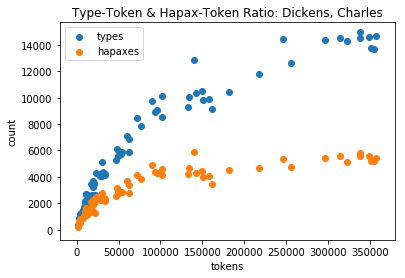

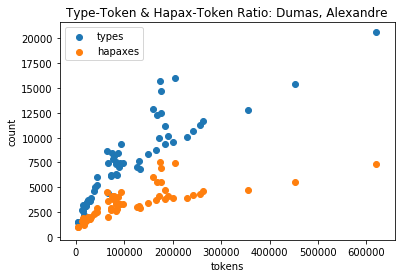

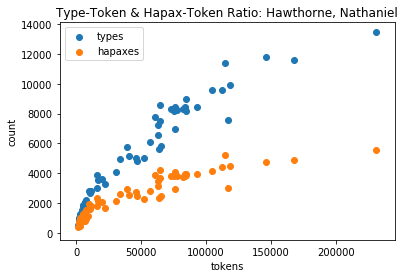

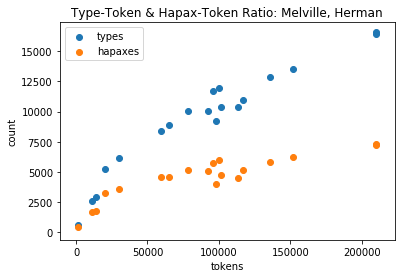

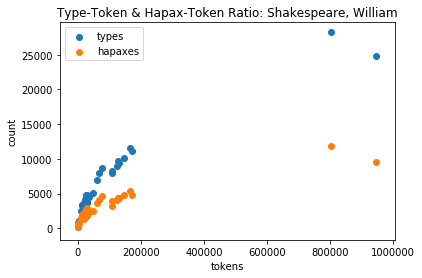

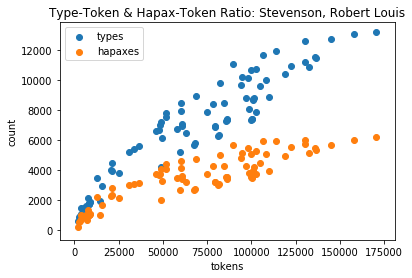

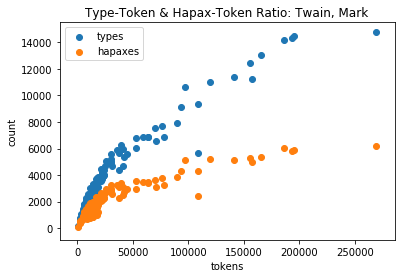

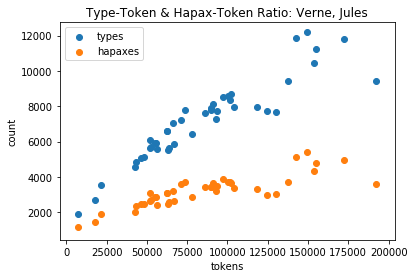

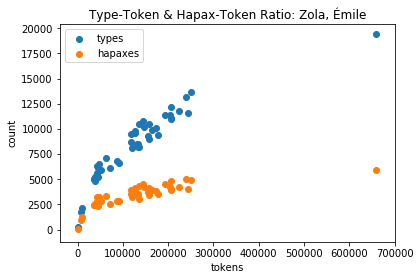

In [72]:
# TTR by author
for author, df in book_data.groupby(["author"]):
    plt.scatter(df.tokens, df.types, label = "types")
    plt.scatter(df.tokens, df.hapaxes, label = "hapaxes")
    plt.title(f"Type-Token & Hapax-Token Ratio: {author}")
    plt.xlabel("tokens")
    plt.ylabel("count")
    plt.legend()
    plt.show()

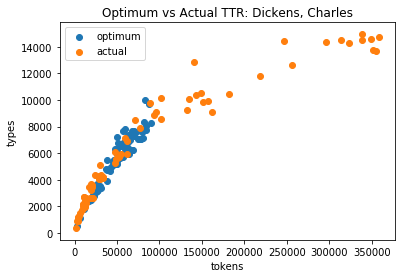

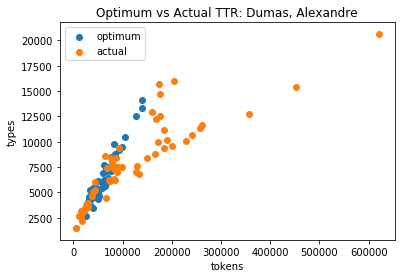

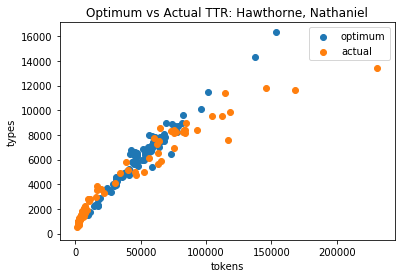

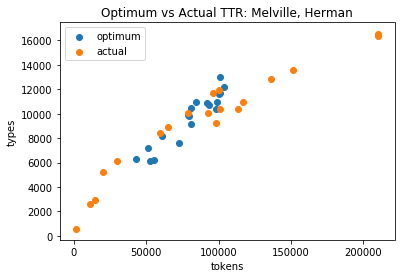

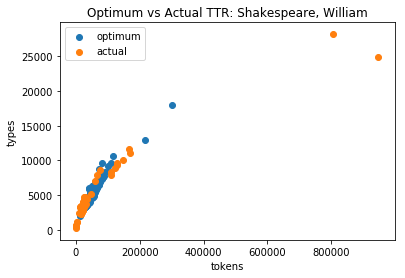

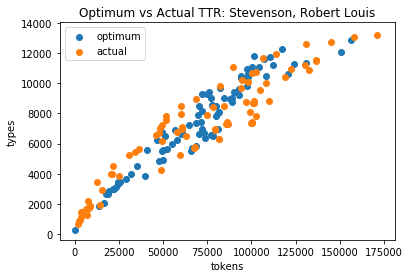

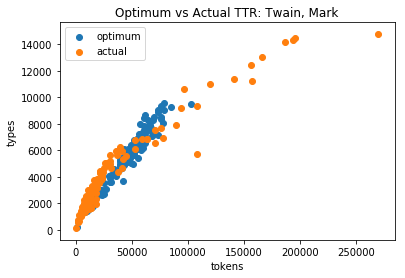

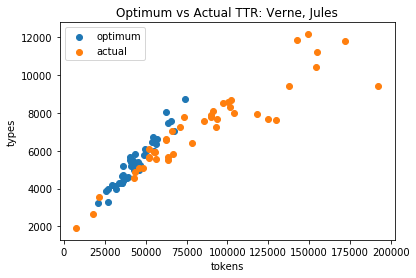

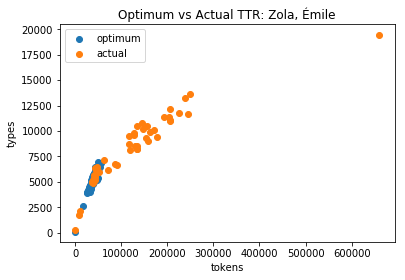

In [73]:
# optimum vs actual per author
for author, df in book_data.groupby(["author"]):
    plt.scatter(df.M_z, df.N_z, label = "optimum")
    plt.scatter(df.tokens, df.types, label = "actual")
    plt.title(f"Optimum vs Actual TTR: {author}")
    plt.xlabel("tokens")
    plt.ylabel("types")
    plt.legend()
    plt.show()

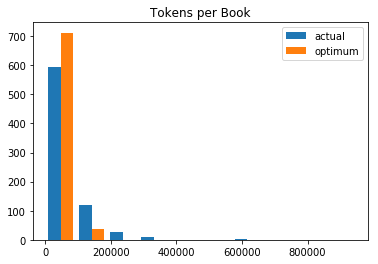

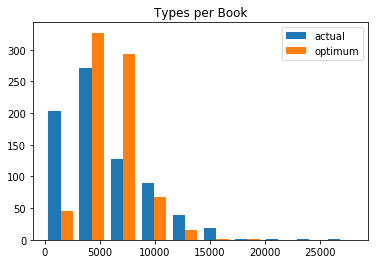

In [77]:
# words per book
plt.hist([book_data.tokens, book_data.M_z], label = ["actual", "optimum"])
plt.title("Tokens per Book")
plt.legend()
plt.show()

# unique words per book
plt.hist([book_data.types, book_data.N_z], label = ["actual", "optimum"])
plt.title("Types per Book")
plt.legend()
plt.show()